In [1]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.data.shape

(506, 13)

In [2]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
import pandas as pd
import numpy as np


In [4]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
import mglearn.datasets
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_yest=train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
print(X.shape,y.shape)

(26, 2) (26,)


In [9]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [10]:
clf.score(X_test,y_yest)

0.8571428571428571

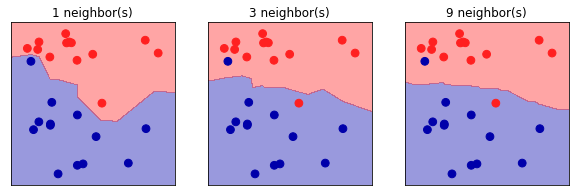

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)

# Knn Classifier

In [12]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(bc.data,bc.target,random_state=0)

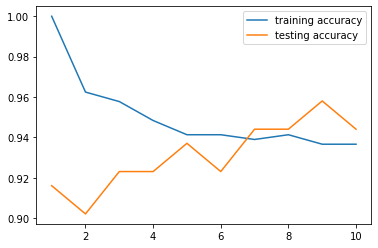

In [13]:
training_acc=[]
testing_acc=[]
neighbors=range(1,11)

#trying n-neighbors from 1 to 10

for n_neighbors in neighbors:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_acc.append(clf.score(X_train,y_train))
    testing_acc.append(clf.score(X_test,y_test))
    
plt.plot(neighbors,training_acc,label='training accuracy')
plt.plot(neighbors,testing_acc,label='testing accuracy')
plt.legend()

In [14]:
#at 8 neighbours they have the almost same accuracy,
#so we should go for the 9 neighbours
clf=KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train,y_train)
print("training accuracy = ",clf.score(X_train,y_train))
print("testing accuracy = ",clf.score(X_test,y_test))

training accuracy =  0.9366197183098591
testing accuracy =  0.958041958041958


# Knn regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=3)

X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

reg.fit(X_train,y_train)
print("training Score= ",reg.score(X_train,y_train))
print("testing score = ",reg.score(X_test,y_test))

training Score=  0.8194343929538755
testing score =  0.8344172446249604


testing score is around 80% so  its a good model

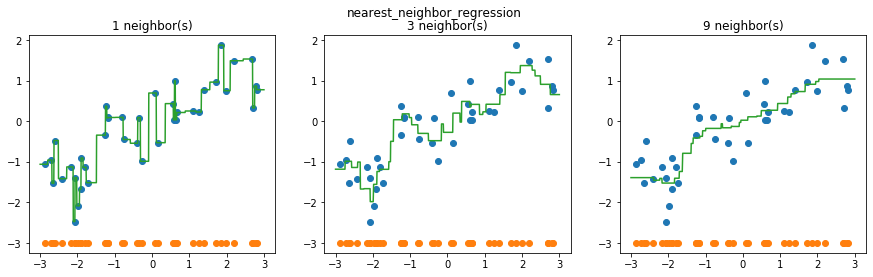

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("nearest_neighbor_regression")
for n_neighbors, ax in zip([1, 3, 9], axes):

    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(X, y, 'o')
    ax.plot(X, -3 * np.ones(len(X)), 'o')
    ax.plot(line, reg.predict(line))
    ax.set_title("%d neighbor(s)" % n_neighbors)

In practice,
using a small number of neighbors like 3 or 5 often works well, but you should cer‐
tainly adjust this parameter.

# Linear model for reegression

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b \text{ (1) linear regression}
\end{align*}

w[0]: 0.393906  b: -0.031804


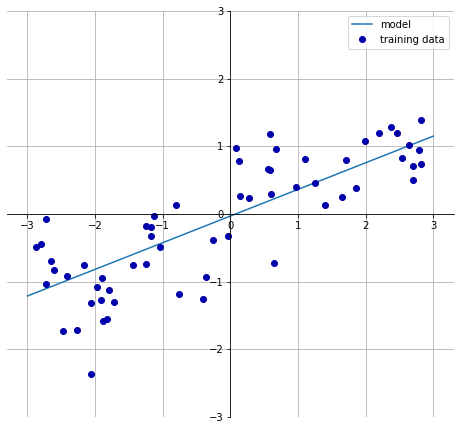

In [17]:
mglearn.plots.plot_linear_regression_wave()


Linear Regression aka Ordinary Least Squares

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [19]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [20]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [21]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.952052
test set score: 0.607472


# ridge regression aka L2 regularisation

We also want the magnitude of coefficients to be as
small as possible; in other words, all entries of w should be close to 0.

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.885797
test set score: 0.752768


default parameter alpha=1.0.

In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.788279
test set score: 0.635941


For very small values of alpha, coefficients are barely restricted at all, and we end up
with a model that resembles LinearRegression.

In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

training set score: 0.928227
test set score: 0.772207


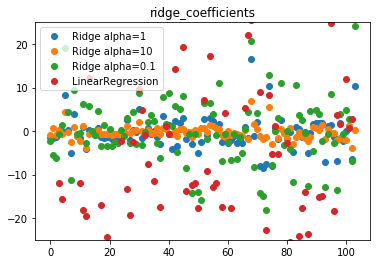

In [26]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on
up to x=100

# Lasso aka L1 regularisation

The consequence of l1 regularization is that when using the Lasso, some coefficients
are exactly zero.
Having some coefficients be exactly
zero often makes a model easier to interpret, and can reveal the most important fea‐
tures of your model.

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

training set score: 0.293238
test set score: 0.209375
number of features used: 4


Above, we used the default of alpha=1.0. To dimin‐
ish underfitting, let’s try decreasing alpha:

In [28]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.896112
test set score: 0.767800
number of features used: 32


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  positive)


A lower alpha allowed us to fit a more complex model, which worked better on the
training and the test data. The performance is slightly better than using Ridge, and we
are using only 32 of the 105 features. This makes this model potentially easier to
understand.

If we set alpha too low, we again remove the effect of regularization and end up with a
result similar to LinearRegression.

In [29]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.942093
test set score: 0.697654
number of features used: 100


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  positive)


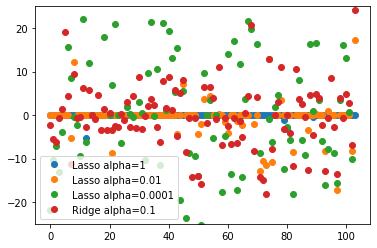

In [30]:
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()

In practice, Ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice

# Linear model for classification

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b > 0 &\text{ (2) linear
binary classification}
\end{align*}

The two most common linear classification algorithms are logistic regression, imple‐
mented in linear_model.LogisticRegression and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for Support Vector Clas‐
sifier)

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


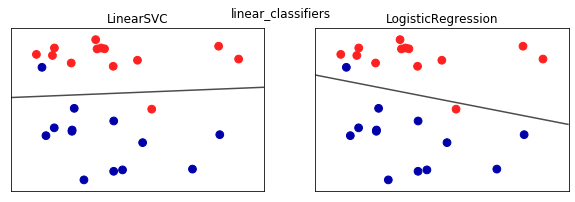

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers")
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)

By default, both models apply an l2 regularization, in the same
way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called C, and higher values of C correspond to less
regularization

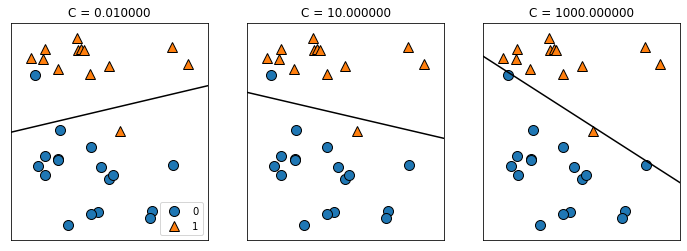

In [32]:
mglearn.plots.plot_linear_svc_regularization()

in high dimensions, linear models for classification
become very powerful, and guarding against overfitting becomes increasingly impor‐
tant when considering more features.

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logisticregression = LogisticRegression().fit(X_train, y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.943662
test set score: 0.958042


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As training and test set performance are very close,
it is likely that we are underfitting.

In [34]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set score: %f" % logisticregression100.score(X_train, y_train))
print("test set score: %f" % logisticregression100.score(X_test, y_test))

training set score: 0.957746
test set score: 0.951049


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

training set score: 0.934272
test set score: 0.930070


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


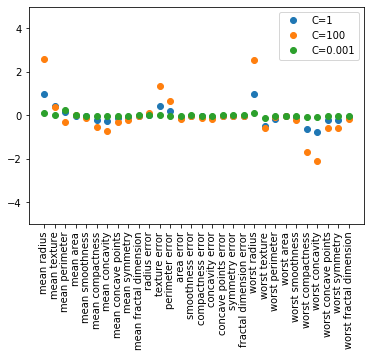

In [36]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

However, the change of sign in
the coefficient for “mean perimeter” means that depending on which model we look
at, high “mean perimeter” could be either taken as being indicative of “benign” or
indicative of “malignant”.

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to only using a few features. Here is the coefficient plot and classifica‐
tion accuracies for L1 regularization:

training accuracy of L1 logreg with C=0.001000: 0.913146
test accuracy of L1 logreg with C=0.001000: 0.923077


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


training accuracy of L1 logreg with C=1.000000: 0.960094
test accuracy of L1 logreg with C=1.000000: 0.958042
training accuracy of L1 logreg with C=100.000000: 0.985915
test accuracy of L1 logreg with C=100.000000: 0.979021


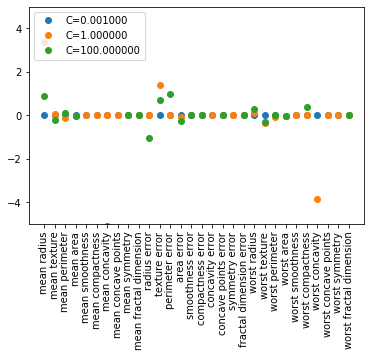

In [37]:
for C in [0.001, 1, 100]:
    
    lr_l1 = LogisticRegression(C=C, penalty="l1",solver='liblinear').fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"% (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f"% (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend(loc=2)

# Linear models for multiclass classifiction

In the one-vs-rest approach, a binary model is learned for each
class, which tries to separate this class from all of the other classes, resulting in as
many binary models as there are classes.

\begin{align*}
& w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b & \text{ (3) classification confi‐
dence}
\end{align*}

We use a two-dimensional dataset, where each class is given by data sampled from a
Gaussian distribution.

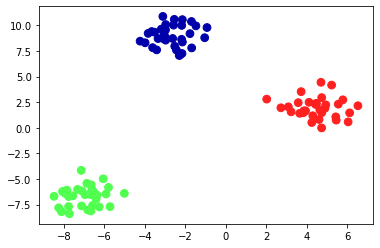

In [38]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)

Now, we train a LinearSVC classifier on the dataset.


In [39]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


(-10, 8)

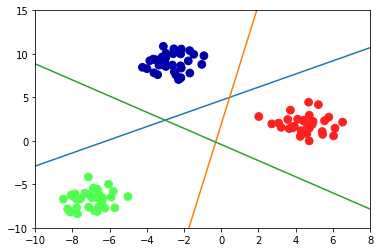

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

taking care for the middle triangle

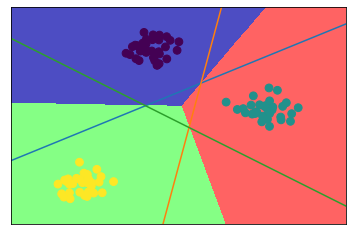

In [41]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

Usually C and alpha are searched for on a logarithmic
scale.
If you assume that only few of your features are actually important,
you should use L1. Otherwise, you should default to L2.

Linear models are very fast to train, and also fast to predict. They scale to very large
datasets and work well with sparse data.However, on smaller dataset, other
models might yield better generalization performance.

# Naive bayes classifier

efficiency is that naive Bayes models often provide generalization perfor‐
mance that is slightly worse than linear classifiers like LogisticRegression and Line
arSVC.
GaussianNB can be applied to any continuous data, while BernoulliNB assumes
binary data and MultinomialNB assumes count data (that is each feature represents an
integer count of something, like how often a word appears in a sentence). Bernoul
liNB and MultinomialNB are mostly used in text data classification.


MultinomialNB takes into account the
average value of each feature for each class, while GaussianNB stores the average value
as well as the standard deviation of each feature for each class.

In [42]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


The algorithms performance is relatively robust to the setting of
alpha, meaning that setting alpha is not critical for good performance However, tun‐
ing it usually improves accuracy somewhat.

Multino‐
mialNB usually performs better than BinaryNB, in particular on datasets with a rela‐
tively large number of non-zero features (i.e. large documents).

# Descision Trees

hierarchy of “if-else” questions

each node in the tree either represents a question, or a terminal

Text(0.5, 0.98, 'animal_tree')

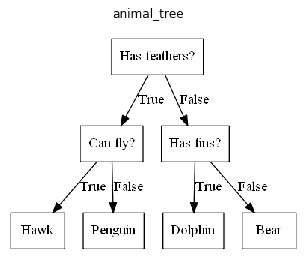

In [43]:
mglearn.plots.plot_animal_tree()
plt.suptitle("animal_tree")

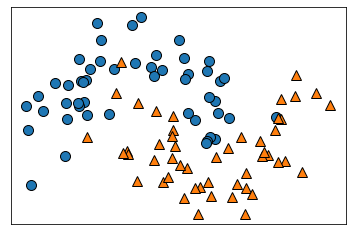

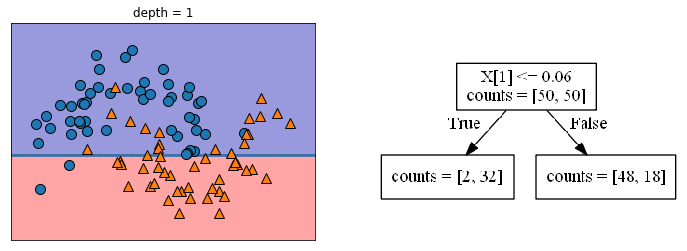

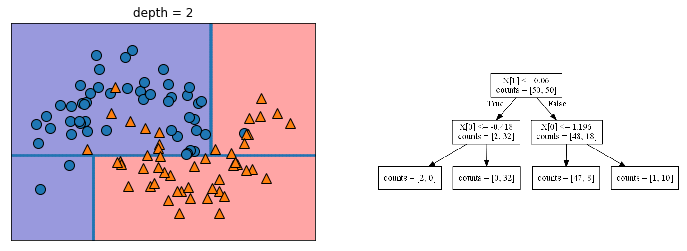

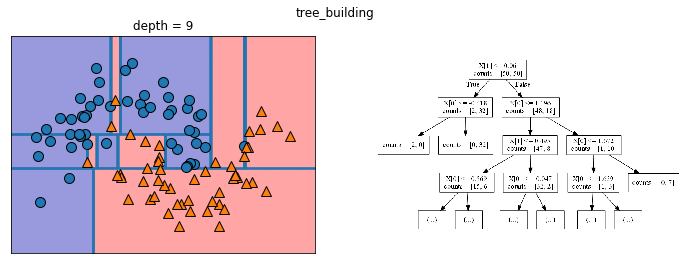

In [44]:
mglearn.plots.plot_tree_progressive()
plt.suptitle("tree_building");

In the machine learning setting, these questions are called tests . The tests that are used on continuous data are of the from “is
feature i larger than value a”.

In [45]:
#conda install python-graphviz

In [ ]:
The
presence of pure leaves mean that a tree is 100% accurate on the training set;
Scikit-learn only implements pre-pruning, not postpruning.
Let’s look at the effect of pre-pruning in more detail on the breast cancer dataset.


In [46]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063


One possible way is to stop building the tree after a certain depth has been reached.
Here we set max_depth=4, 

In [47]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


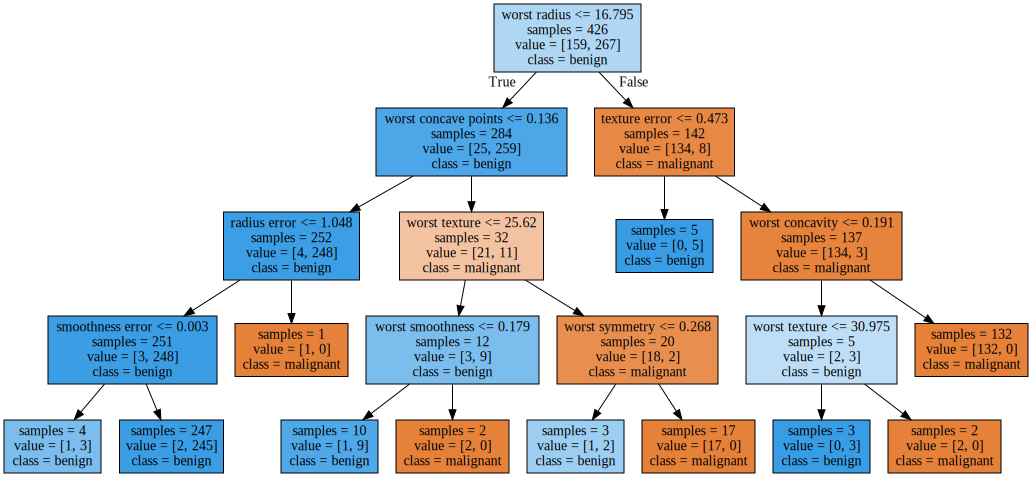

In [48]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

feature importance, which rates how important each feature is for the decision a tree makes. 

In [49]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

(0, 1)

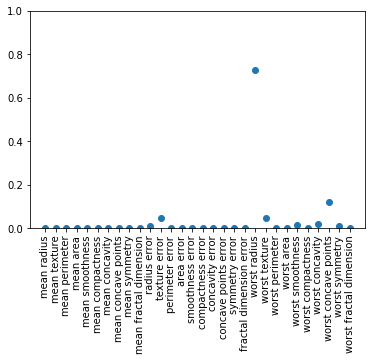

In [50]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1)

The feature importances
tell us that worst radius is important, but it does not tell us whether a high radius is
indicative of a sample being “benign” or “malignant”

In fact, there might not be such
a simple relationship between features and class, as you can see in the example below:

Feature importances: [0. 1.]


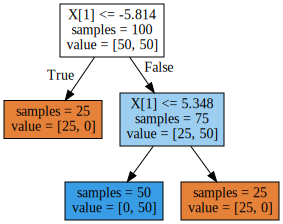

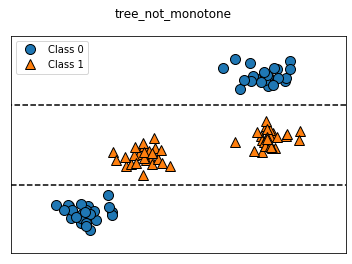

In [51]:
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone")
tree

all that was
said is similarly true for decision trees for regression, as implemented in Decision
TreeRegressor. Both the usage and the analysis of regression trees are very similar to
classification trees, so we won’t go into any more detail here.

Usually picking one of the pre-pruning strategies, either setting
min_depth, max_leaf_nodes or min_samples_leaf is to prevent overfitting.

no preprocessing like normalization or standardization of features is
needed for decision tree algorithms.

# Ensembles of descision trees

Ensembles are methods that combine multiple machine learning models to create
more powerful models.
datasets for classification and regression, both of which use decision trees as
their building block: Random Forests and Gradient Boosted Decision Trees.

# random forests

If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results. This reduction in overfit‐
ting, while retaining the predictive power of the trees, can be shown using rigorous
mathematics.

Random forests get their name from injecting randomness into the tree build‐
ing to ensure each tree is different.

To build a tree, we first take what is called a bootstrap sample of our data.

To illustrate, lets say we want to create a bootstrap sample of the list ['a', 'b', 'c',
'd']. A possible bootstrap sample would be ['b', 'd', 'd', 'c']. Another possi‐
ble sample would be ['d', 'a', 'd', 'a'].

n_samples and max_samples, Together these two mecha‐
nisms ensure that all the trees in the random forests are different.

The probabilities predicted by all the trees are averaged, and the class with the
highest label is predicted.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

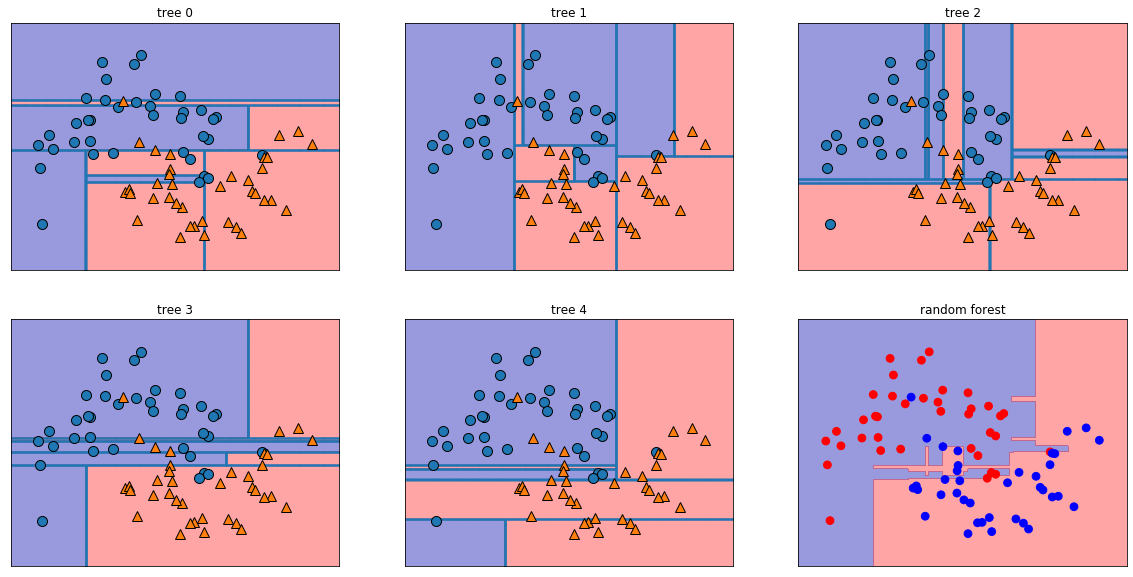

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")

plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

In [ ]:
In any real application, we would use many more
trees (often hundreds or thousands), leading to even smoother boundaries.
Let’s apply a random forest consisting of 100 trees on the breast cancer dataset:


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


In [ ]:
feature importances provided by the random forest are more reliable than
the ones provided by a single tree.

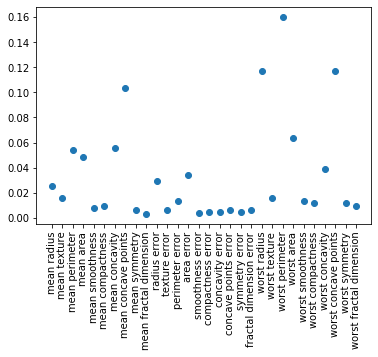

In [55]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

While building random forests on large dataset might be somewhat time-consuming,
it an be parallelized across multiple CPU cores within a computer easily. If you are
using a multi-core processor (as nearly all modern computers do), you can use the
n_jobs parameter to adjust the number of cores to use. Using more CPU cores will
result in linear speed-ups (using two cores, the training of the random forest will be
twice as fast), but specifying n_jobs larger than the number of cores will not help.
You can set n_jobs=-1 to use all the cores in your computer.

If you want to have reproducible results,
it is important to fix the random_state.

If time and memory are important in an application, it might make sense to use a
linear model instead.
The default values, and a good rule of thumb, are
max_features=sqrt(n_features) for classification and max_features=log2(n_fea
tures) for regression.

# Gradient Boosted Regression Trees (Gradient Boosting Machines)


gradient boosting works by building trees in a serial
manner, where each tree tries to correct the mistakes of the previous one.
The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), 

sensitive to
parameter settings than random forests, but can provide better accuracy if the param‐
eter are set correctly

By default, 100 trees of maximum depth three are used, with a learning rate of 0.1.


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.965035


In [ ]:
As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [57]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))


accuracy on training set: 0.990610
accuracy on test set: 0.972028


In [58]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.965035


In [ ]:
Both methods of decreasing the model complexity decreased the training set accuracy
as expected. In this case, lowering the maximum depth of the trees provided a signifi‐
cant improvement of the model, while lowering the learning rate only
increased the generalization performance slightly.

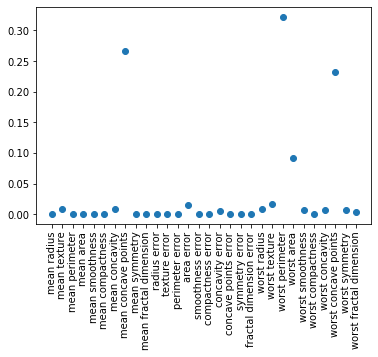

In [59]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

We can see that the feature importances of the gradient boosted trees are somewhat
similar to the feature importances of the random forests, though the gradient boost‐
ing completely ignored some of the features.
As gradient boosting and random forest perform well on similar kinds of data, a
common approach is to first try random forests, which work quite robustly. If ran‐
dom forests work well, but prediction time is at a premium, or it is important to
squeeze out the last percentage of accuracy from the machine learning model, mov‐
ing to gradient boosting often helps.

does not work well on high-dimensional sparse data.

number of trees
n_estimators, and the learning_rate,

A common practice is to fit n_estimators depending on the time and memory
budget, and then search over different learning_rates.

# kernalised support vector maachines

In [ ]:
linear models can be quite
limiting in lowdimensional spaces, as lines or hyperplanes have limited flexibility.

Let’s look at the synthetic dataset we used in Figure tree_not_monotone:


Text(0, 0.5, 'feature2')

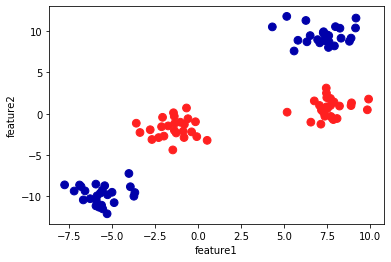

In [60]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

In [ ]:
A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset:

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature2')

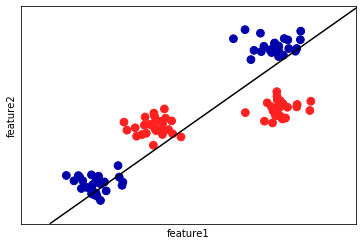

In [61]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

In [ ]:
Now, let’s expand the set of input features, say by also adding feature2 ** 2, the
square of the second feature, as a new feature.

Text(0.5, 0, 'feature1 ** 2')

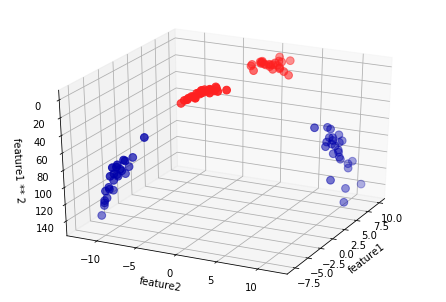

In [62]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

In [ ]:
In the new, three-dimensional representation of the data, it is now indeed possible to
separate the red and the blue points
using a linear model, a plane in three dimensions. We can confirm this by fitting a
linear model to the augmented data:

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

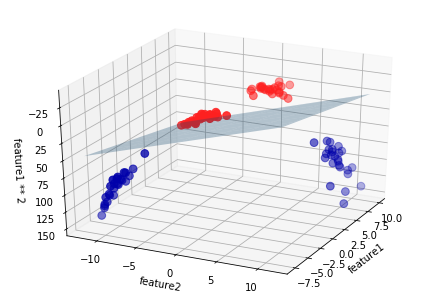

In [63]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear any‐
more. It is not a line, but more of an ellipse.

Text(0, 0.5, 'feature2')

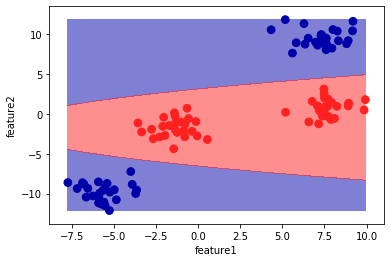

In [64]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

# The Kernel Trick


The lesson here is that adding non-linear features to the representation of our data
can make linear models much more powerful.

The kernel trick works by directly computing the distance (more precisely, the scalar
products) of the data points for the expanded feature representation, without ever
actually computing the expansion.

the polynomial kernel, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5), and the radial basis function (rbf) kernel, also known as Gaus‐
sian kernel.

One way to explain the Gaussian kernel is that it considers all
possible polynomials of all degrees, but the importance of the features decreases for
higher degrees.

Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called support vectors and give the support vec‐
tor machine its name.

A classification decision is made based on the distance to the support vectors, and the
importance of the support vectors that was learned during training (stored in the
dual_coef_ attribute of SVC)

\begin{align*}
&k_\text{rbf}(x_1, x_2) = \exp(\gamma||x_1 - x_2||^2) &\text{ (4) Gaussian kernel}
\end{align*}

Here, $x_1$ and $x_2$ are data points, $||x_1 - x_2 ||$ denotes Euclidean distance
and $\gamma$ is a parameter that controls the width of the Gaussian kernel.

The decision boundary is shown in black, and the support vectors are the points with
wide black circles.

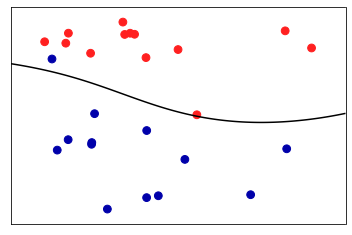

In [65]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=mglearn.cm2)
# plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200, facecolors='none', zorder=10, linewidth=3)

gamma parameter is the one shown in Formula (4), which controls the width of
the Gaussian kernel. Let’s have a look at what happens when we vary these parameters:
    
A small
gamma means a large radius    

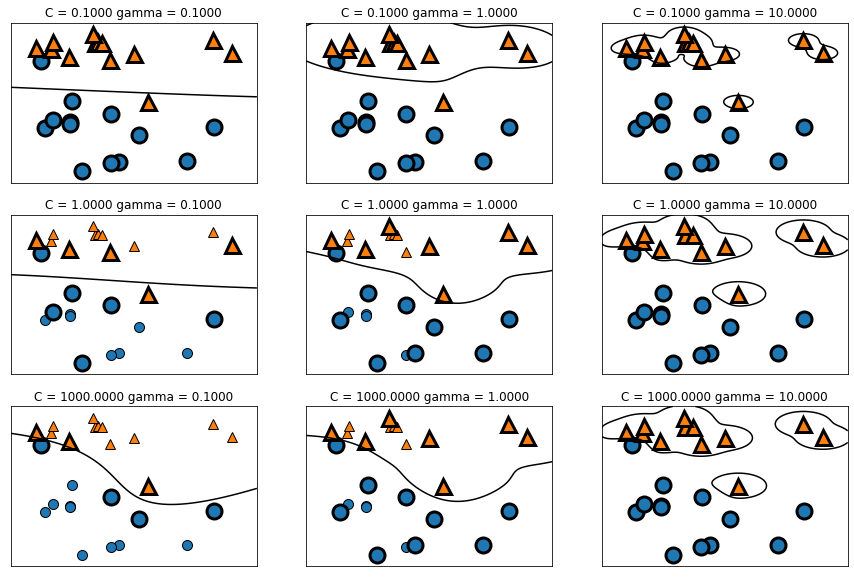

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

Let’s apply the rbf kernel SVM to the breast cancer dataset. By default, C=1 and
gamma=1./n_features.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))


accuracy on training set: 0.903756
accuracy on test set: 0.937063


Let’s look at the minimum and maximum values for each fea‐
ture, plotted in log-space:

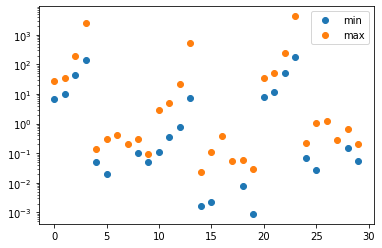

In [68]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")

Preprocessing Data for SVMs:::A common rescaling methods for kernel SVMs is to scale the data such that all fea‐
tures are between zero and one.

In [69]:
# Compute the minimum value per feature on the training set

min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set

range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterwards min=0 and max=1 for each feature

X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature\n %s" % X_train_scaled.max(axis=0))


# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.

X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))
a

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
accuracy on training set: 0.983568
accuracy on test set: 0.972028
accuracy on training set: 1.000000
accuracy on test set: 0.958042


increasing C allows us to improve the model significantly, resulting in 97.2%
accuracy.

Kernelized support vector machines are very powerful models and perform very well
on a variety of datasets.

Running on
data with up to 10000 samples might work well, but working with datasets of size
100000 or more can become challenging in terms of runtime and memory usage.

random for‐
ests (that require little or no preprocessing)

The rbf ker‐
nel has only one parameter, gamma, which is the inverse of the width of the Gaussian
kernel. gamma and C both control the complexity of the model, with large values in
either resulting in a more complex model. 

# Neural Network (Deep Learning)

Multilayer perceptrons (MLPs) are also known as (vanilla)
feed-forward neural networks, or sometimes just neural networks.

MLPs can be viewed as generalizations of linear models which perform multiple
stages of processing to come to a decision.

In words, y is a weighted sum of the input features x[0] to x[p], weighted by the
learned coefficients w[0] to w[p]. We could visualize this graphically as:

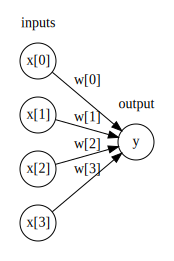

In [70]:
mglearn.plots.plot_logistic_regression_graph()

Figure single_hidden_layer


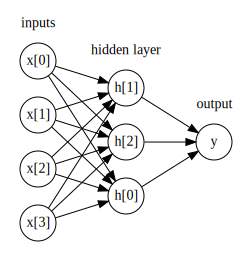

In [71]:
print("Figure single_hidden_layer")
mglearn.plots.plot_single_hidden_layer_graph()

one extra trick we need. After computing a weighted sum for each hidden
unit, a non-linear function is applied to the result, usually the rectifying nonlinearity
(also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh).

Text(0.5, 1.0, 'activation_functions')

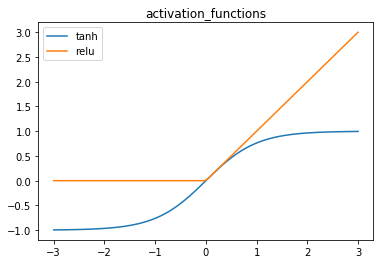

In [72]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")

Having large neural networks made up of many of these layers of computation is
what inspired the term “deep learning”.

Figure two_hidden_layers


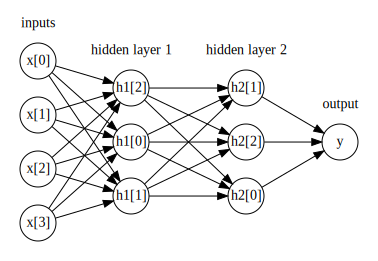

In [74]:
print("Figure two_hidden_layers")
mglearn.plots.plot_two_hidden_layer_graph()

Tuning Neural Networks


Let’s look into the workings of the MLP by applying the MLPClassifier to the
two_moons dataset we saw above.

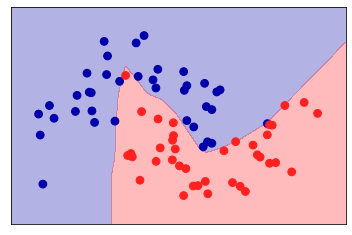

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

In [ ]:
We used algorithm='lbfgs' which we will discuss later.
By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.

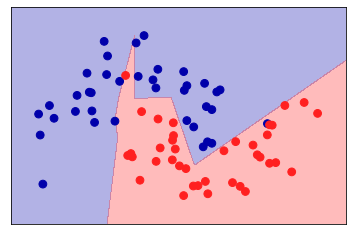

In [78]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

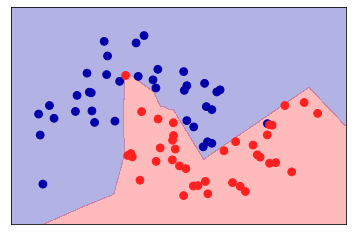

In [79]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

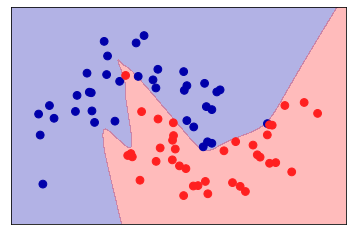

In [80]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


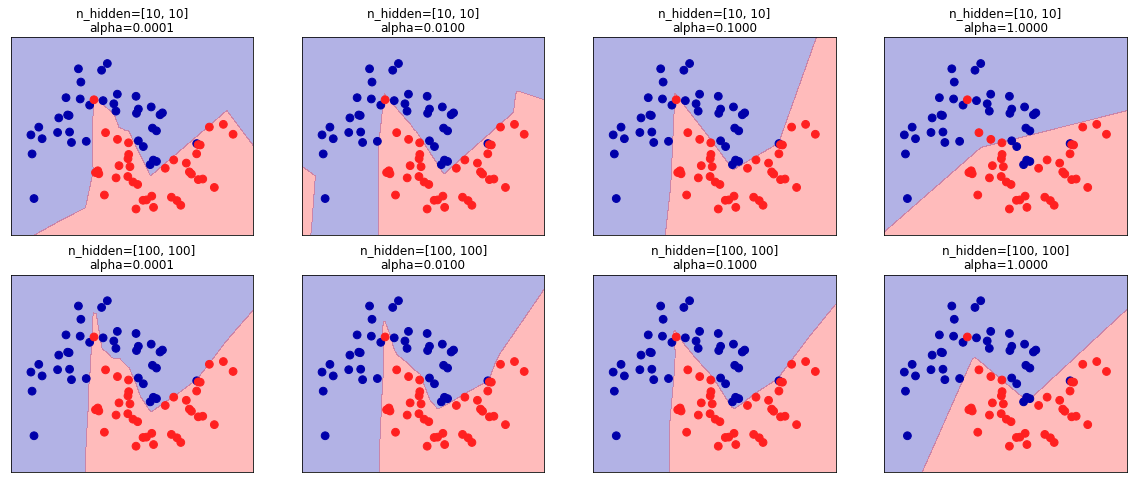

In [81]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha)
        
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        
        axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"
                      % (n_hidden_nodes, n_hidden_nodes, alpha))

As you probably have realized by now, there are many ways to control the complexity
of a neural network: the number of hidden layers, the number of units in each hidden
layer, and the regularization (alpha). There are actually even more, which we won’t go
into here.
An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds.

Here are plots of several models, all learned with the same settings of the parameters:


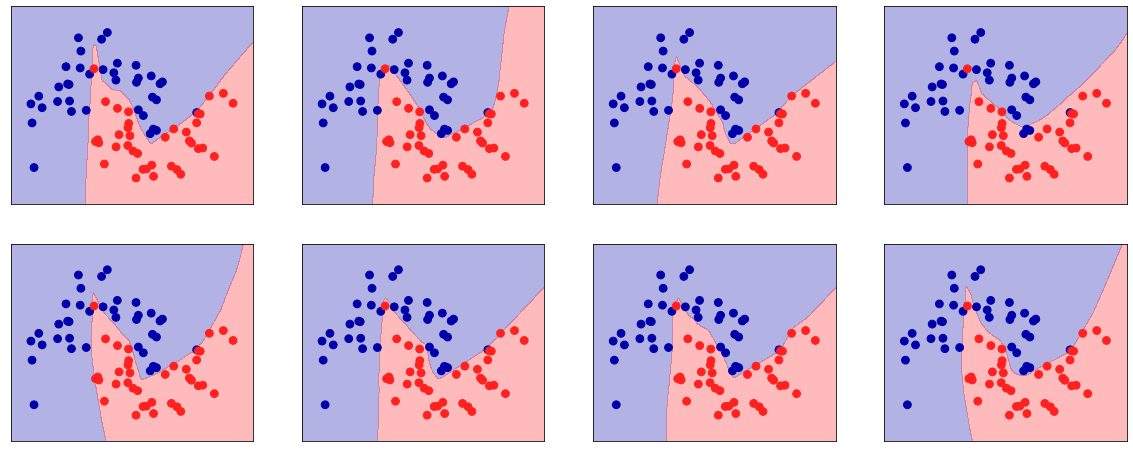

In [82]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    
    mlp.fit(X_train, y_train)
    
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

To get a better understanding of neural networks on real-world data, let’s apply the
MLPClassifier to the breast cancer dataset. We start with the default parameters:

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print("accuracy on training set: %f" % mlp.score(X_train, y_train))
print("accuracy on test set: %f" % mlp.score(X_test, y_test))

accuracy on training set: 0.887324
accuracy on test set: 0.874126


Neural networks also expect all input features to vary in a simi‐
lar way, and ideally should have a mean of zero, and a variance of one.

In [85]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)

mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.965035


C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competative. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [86]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


Here, we choose to increase the alpha parameter (quite
aggressively, from 0.0001 to 1), to add stronger regularization of the weights.

In [87]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.972028


You might
have noticed at this point that many of the well-performing models achieved exactly
the same accuracy of 0.972. This means that all of the models make exactly the same
number of mistakes, which is four.

The rows in this plot correspond to the 30 input features, while the columns corre‐
spond to the 100 hidden units.
Light green represents large positive values, while dark blue represents negative val‐
ues.

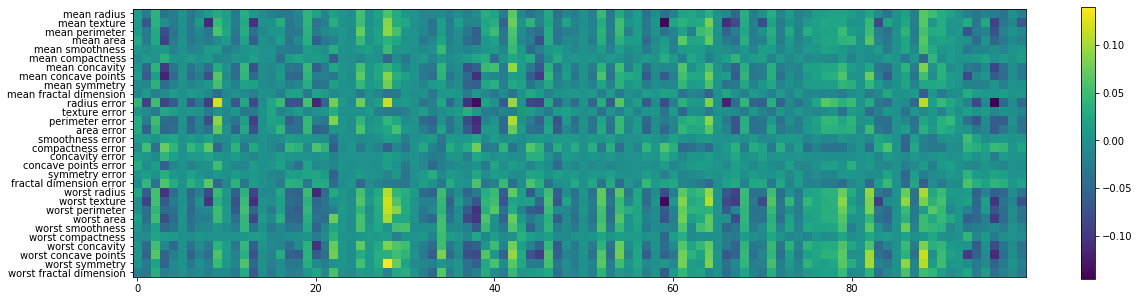

In [88]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()

One possible inference we can make is that features that have very small weights for
all of the hidden units are “less important” to the model. 

For python users, the most well-established are
keras, lasagna and tensor-flow. Keras and lasagna both build on the theano library.

All of the popular deep learning
libraries also allow the use of high-performance graphic processing units (GPUs),
which scikit-learn does not support.

Given enough computation time, data, and careful tuning of the parameters, neural
networks often beat other machine learning algorithms (for classification and regres‐
sion tasks).

Similarly to SVMs, they work best with “homogeneous” data,
where all the features have similar meanings. For data that has very different kinds of
features, tree-based models might work better.
Tuning neural network parameters is also an art onto itself. In our experiments
above, we barely scratched the surface of possible ways to adjust neural network
models, and how to train them.

The number of nodes per hidden layer is often around the number of the
input features, but rarely higher than in the low to mid thousands.

There are two easy-to-use choices for the algorithm. The default is 'adam', which
works well in most situations but is quite sensitive to the scaling of the data (so it is
important to always scale your data to zero mean and unit variance). The other one is
'l-bfgs', which is quite robust, but might take a long time on larger models or larger
datasets.


There is also the more advanced 'sgd' option, which is what many deep learning
researchers use. The 'sgd' option comes with many additional parameters that need
to be tuned for best results. You can find all of these parameters and their definitions
in the user-guide. When starting to work with MLPs, we recommend sticking to adam
and l-bfgs.

In practice, different kinds
of mistakes lead to very different outcomes in real world applications. Imagine a
medical application testing for cancer. Making a false positive prediction might lead
to a patient undergoing additional tests, while a false negative prediction might lead
to a serious disease not being treated.

Let’s look
at what these two functions do on as synthetic two-dimensional dataset, when build‐
ing a GradientBoostingClassifier classifier. GradientBoostingClassifier has
both a decision_function method and a predict_proba.

In [89]:
# create and split a synthetic dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
# X, y = make_blobs(centers=2, random_state=59)
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]
# we can call train test split with arbitrary many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The Decision Function:::
In the binary classification case, the return value of decision_function is of shape
(n_samples,), it returns one floating point number for each sample:

In [90]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)

(25, 2)
(25,)


This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1.

In [91]:
# show the first few entries of decision_function
gbrt.decision_function(X_test)[:6]

array([ 4.13592629, -1.7016989 , -3.95106099, -3.62599351,  4.28986668,
        3.66166106])

In [92]:
#We can recover the prediction by looking only at the sign of the decision function:

print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [93]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
np.all(pred == gbrt.predict(X_test))


decision_function = gbrt.decision_function(X_test)
np.min(decision_function), np.max(decision_function)

(-7.69097177301218, 4.289866676868515)

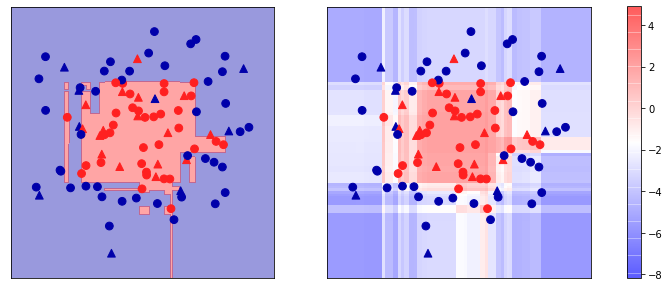

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')

for ax in axes:
# plot training and test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())

In [95]:
#Predicting probabilities

gbrt.predict_proba(X_test).shape

np.set_printoptions(suppress=True, precision=3)
# show the first few entries of predict_proba
gbrt.predict_proba(X_test[:6])

array([[0.016, 0.984],
       [0.846, 0.154],
       [0.981, 0.019],
       [0.974, 0.026],
       [0.014, 0.986],
       [0.025, 0.975]])

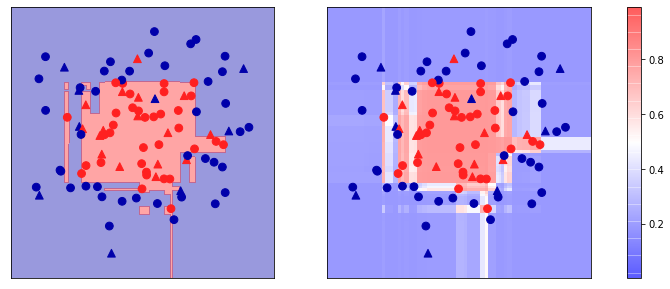

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,
cm='bwr', function='predict_proba')
for ax in axes:
# plot training and test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())

Uncertainty in multi-class classification

In [97]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
print(gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print(gbrt.decision_function(X_test)[:6, :])

(38, 3)
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In [99]:
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [100]:
# show the first few entries of predict_proba
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("sums: %s" % gbrt.predict_proba(X_test)[:6].sum(axis=1))

[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
sums: [1. 1. 1. 1. 1. 1.]


In [101]:
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


To summarize, predict_proba and decision_function always have shape (n_sam
ples, n_classes) -- apart from the special case of decision_function in the binary
case. In the binary case, decision_function only has one column, corresponding to
the “positive” class classes_[1]. This is mostly for historical reasons.
You can recover the prediction when there are n_classes many columns by simply
computing the argmax across columns.
Be careful, though, if your classes are strings, or you use integers, but they are not
consecutive and starting from 0. If you want to compare results obtained with pre
dict to results obtained via decision_function or predict_proba make sure to use
the classes_ attribute of the classifier to get the actual class names.